11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.8798 - loss: 0.3956 - val_accuracy: 0.9787 - val_loss: 0.0653
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9842 - loss: 0.0503 - val_accuracy: 0.9872 - val_loss: 0.0396
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9883 - loss: 0.0369 - val_accuracy: 0.9902 - val_loss: 0.0306
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9865 - loss: 0.0389
Test Loss: 0.0306
Test Accuracy: 0.9902


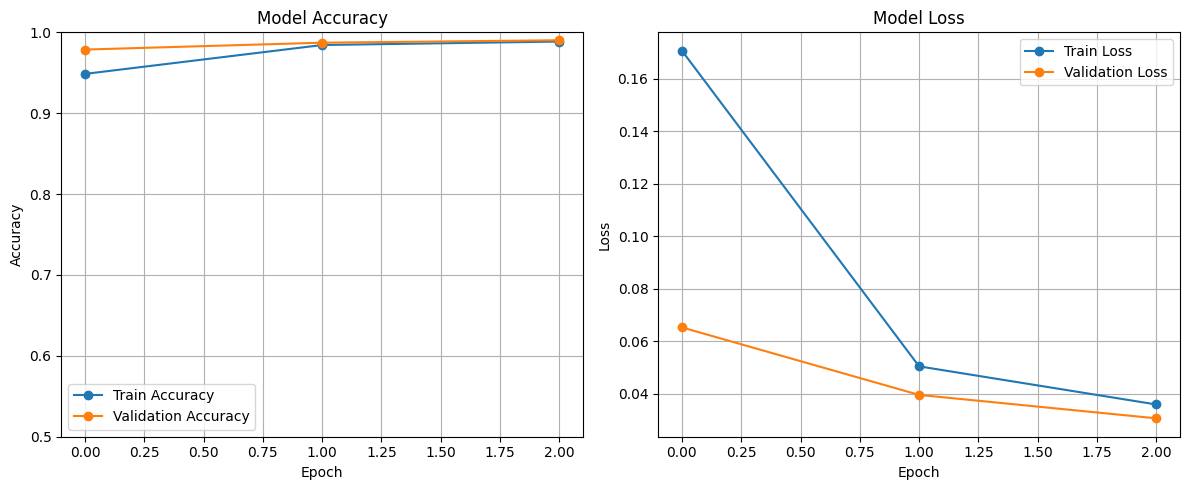

In [ ]:
# CNN Model for Grayscale Images (MNIST) - Showing Accuracy and Loss Graphs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

# Evaluate Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.2974 - loss: 1.8997 - val_accuracy: 0.5425 - val_loss: 1.2828
Epoch 2/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 546s 1s/step - accuracy: 0.5371 - loss: 1.2891 - val_accuracy: 0.6606 - val_loss: 0.9722
Epoch 3/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step - accuracy: 0.6267 - loss: 1.0609 - val_accuracy: 0.6885 - val_loss: 0.8953
Epoch 4/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 579s 1s/step - accuracy: 0.6651 - loss: 0.9454 - val_accuracy: 0.7095 - val_loss: 0.8252
Test loss: 0.825193464756012
Test accuracy: 0.7095000147819519


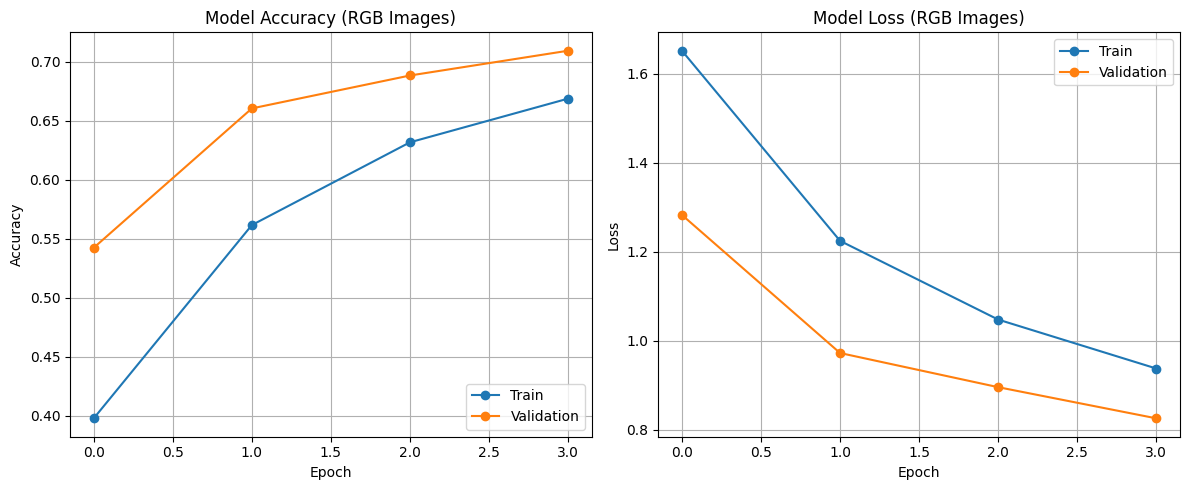

In [ ]:
# Import Libraries
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

# Build the CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(125, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=4, verbose=1,
                    validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training history: Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy (RGB Images)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss (RGB Images)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()
